# Курс "Практикум по математической статистике"
# 3 курс ФПМИ МФТИ, осень 2020
## Домашнее задание 2. Методы нахождения оценок
### Дедлайн --- 16 октября 9:00

Это первое обязательное домашнее задание нашего курса. Мы предлагаем выполнять задания прямо в этом ноутбуке. Пожалуйста, не стирайте условия задач.

Информация о выполнении и курсе в целом есть в <a href=https://docs.google.com/document/d/1kd85QRAS8fbxRxpMzP2IsbQ_YcVsU-Aczqd6ErXgIDg/edit#>этой папке</a>.

В этом и последующих заданиях вам потребуется выполнять генерацию случайных величин из некоторого распределения. Для этого вам понадобится библиотека scipy.stats. Мы настоятельно рекомендуем для генерации выборок использовать именно эту библиотеку.

Настоятельно рекомендуемая форма оформления домашних заданий — это Jupyter Notebook и его pdf-версия с:

* условием задачи,
* решением (если требуется некоторый теоретический вывод),
* описанием плана решения, который потом реализуется в коде, 
* собственно кодом, 
* построенными графиками (если это требуется) и **выводом**, который как правило должен заключаться в объяснении практических результатов с использованием теоретических фактов. ***Вывод требуется даже в том случае, если в условии об этом явно не сказано!***
* некоторыми другими вещами, если об этом будет указано в задании.

Оценка за каждую задачу складывается из правильного выполнения всех этих пунктов. Закрывая на них глаза, вы сознательно понижаете свою оценку.

Каждая задача оценивается в 10 баллов, если не оговорено иного.

Загрузим все необходимые датасеты. Если что-то пошло не так, то просто скачайте файлы по ссылке вручную.

In [ ]:
!pip install -q gdown
!gdown https://drive.google.com/uc?id=1fMQ0H-_E4U25XHB2SH7ryoZPLG2MHlLQ
!gdown https://drive.google.com/uc?id=1cJywRii7wBZa0B2uAvvu56JFCLPnlOSs

Downloading...
From: https://drive.google.com/uc?id=1fMQ0H-_E4U25XHB2SH7ryoZPLG2MHlLQ
To: /content/Cauchy.csv
100% 18.7k/18.7k [00:00<00:00, 17.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1cJywRii7wBZa0B2uAvvu56JFCLPnlOSs
To: /content/Weibull.csv
100% 17.9k/17.9k [00:00<00:00, 35.4MB/s]


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats as sps

from matplotlib import pyplot as plt
import seaborn as sns

sns.set(style="darkgrid", font_scale=1.4)

## Задача 1

На высоте 1 метр от поверхности Земли закреплено устройство,
которое периодически излучает лучи на поверхность Земли (считайте,
что поверхность Земли представляет из себя прямую). Пусть $l$ —
перпендикуляр к поверхности Земли, опущенный из точки, в которой
закреплено устройство. Угол к прямой $l$ (под которым происходит
излучение) устройство выбирает случайно из равномерного
распределения на отрезке $\left(-\frac{\pi}{2}, \frac{\pi}{2}\right)$ (все выборы
осуществляются независимо). В этих предположениях точки пересечения
с поверхностью имеют распределение Коши с плотностью $p(x) =
\frac{1}{\pi(1 + (x-x_0)^2)}.$ Неизвестный параметр сдвига $x_0$
соответствует проекции точки расположения устройства на поверхность
Земли (направление оси и начало координат на поверхности Земли
выбраны заранее некоторым образом независимо от расположения
устройства). В файле `Cauchy.csv` находятся координаты точек
пересечения лучей с поверхностью Земли.

In [ ]:
cauchy_sample = pd.read_csv("Cauchy.csv")["sample"].values

 Оцените параметр сдвига
методом максимального правдоподобия 
* по первым 10 измерениям
* по первым 100 измерениям
* по всей выборке. 

Оценку произведите по сетке (т.е. возьмите набор
точек с некоторым шагом и верните ту, на которой достигается
максимум функции правдоподобия). Известно, что параметр сдвига принадлежит интервалу $[-1000, 1000].$ Выберите шаг равным 0.01. Интервал можете итеративно уменьшать, но не стоит делать его длину меньше 50.


**Немного теории** \\
Нужно найти значение $x_0$, при котором достигается максимум (логарифмической) функции правдоподобия. \\
Логарифмическая функция правдоподобия: \\
$L_{x_0}=ln(p(X_1)*...*p(X_n))=\sum\limits_{i=1}^n ln\ p(X_i)=\sum\limits_{i=1}^n (-ln \pi - ln(1+(X_i-x_0)^2))=-n\ ln\pi - \sum\limits_{i=1}^nln(1+(X_i-x_0)^2)$ \\
Значит, нужно минимизировать $\sum\limits_{i=1}^nln(1+(X_i-x_0)^2)$.

In [ ]:
def count_value(sample, x0):
  return np.sum(np.log(1+np.power((sample-x0),2)))

def likelyhood_method(sample, x0_start, x0_end, step):
  smallest_func_value = count_value(sample, x0_start)
  x0_result = x0_start
  for x0 in np.arange(x0_start, x0_end + step, step):
    current_value = count_value(sample, x0)
    if current_value < smallest_func_value:
      smallest_func_value = current_value
      x0_result = x0
  return x0_result

In [ ]:
estimation_1 = likelyhood_method(cauchy_sample[:10], -1000, 1000, 0.01)
estimation_2 = likelyhood_method(cauchy_sample[:100], -1000, 1000, 0.01)
estimation_3 = likelyhood_method(cauchy_sample, -1000, 1000, 0.01)

Сравните полученные результаты с `sps.cauchy.fit`

In [ ]:
sps_estimation = sps.cauchy.fit(cauchy_sample)[0]
print(abs(sps_estimation-estimation_1))
print(abs(sps_estimation-estimation_2))
print(abs(sps_estimation-estimation_3))

0.552271719457508
0.07772828054191905
0.0022717194580081923


Давайте еще улучшим оценку, уменьшив шаг

In [ ]:
better_estimation = likelyhood_method(cauchy_sample, estimation_3-50, estimation_3+50, 0.001)
print(abs(sps_estimation-better_estimation))

0.0002717196967410018


**Вывод:** метод максимального парвдоподобия дал довольно точную оценку на параметр.

## Задача 2
В банкомате "Тинькофф" в Новом Корпусе МФТИ каждую минуту подсчитывается баланс по
сравнению с началом дня (6 часов утра). В полночь работники банка
измеряют две величины: $X^1$ – максимальное значение баланса за
день, $X^2$ – значение баланса в полночь. Считается, что величина
$X = X^1 - X^2$ имеет распределение Вейбулла с функцией распределения $F(x) = 1 - e^{-x^\gamma} (x > 0),$ где $\gamma > 0$ –
параметр формы. В течение 10 лет каждый день банк проводил
измерение величины $X,$ получив в результате выборку $X_1, \ldots,
X_{3652}.$ В файле Weibull.csv находятся соответствующие измерения.

In [ ]:
weibull_sample = np.loadtxt("Weibull.csv")

Постройте гистограмму выборки. Не забудьте подобрать `xlim`, `ylim` и параметр `bins`, чтобы гистограмма была информативна

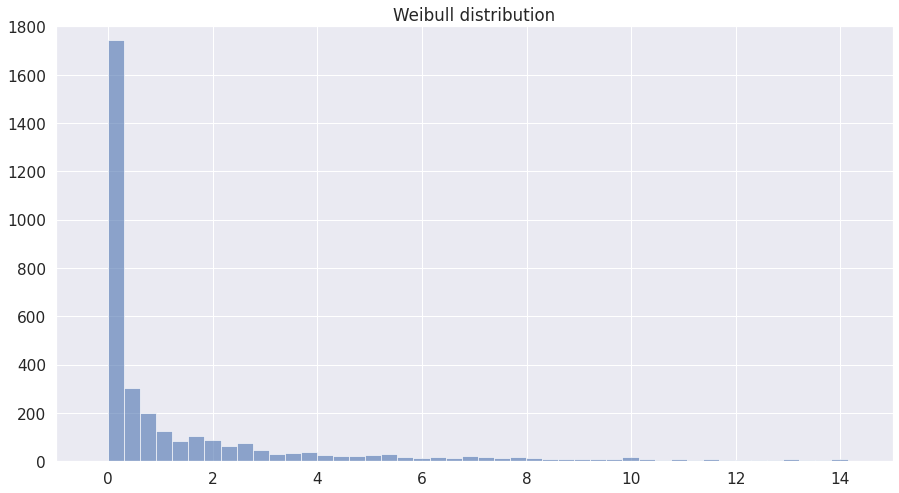

In [ ]:
plt.figure(figsize=(15, 8))
plt.title("Weibull distribution")
plt.hist(weibull_sample, alpha=0.6, bins=1200)

plt.xlim(-1, 15)
plt.ylim(0, 1800)
plt.show()

Проведем небольшой предварительный анализ. Итак, если наши данные распределены согласно распределению Вейбулла, то справедливы следующие рассуждения:
$$
\begin{aligned} F(x) &=1-e^{-(x)^{\gamma}} \\-\ln (1-F(x)) &=x^{\gamma} \\ \underbrace{\ln (-\ln (1-F(x)))}_{y^{\prime}} &=\underbrace{\gamma \ln x}_{\text {kx }^{\prime}} \end{aligned}
$$
А значит и
$$
\underbrace{\ln (-\ln (1-\hat{F}(x)))}_{y^{\prime}} ≈\underbrace{\gamma \ln x}_{\text {kx }^{\prime}}
$$


Однако здесь мы сталкиваемся с проблемой: в нашей выборке есть нули. А логарифм нуля, как известно, не определен. Мы предлагаем вам сравнить два способа рещения этой проблемы:

1. Отбросить нули до построения эмпирической функции распределения $\hat{F}(x)$
2. Построить эмпирическую функцию, а затем учитывать только те точки, x-координата которых положительна.

Для первого способа отфильтруйте выборку в ячейке ниже

In [ ]:
weibull_sample_nonzero = weibull_sample[np.nonzero(weibull_sample)]

Для каждого способа подсчитайте эмпирическую функцию распределения и 
$$y\prime = \ln (-\ln (1-\hat{F}(x))) \quad x' = ln x$$
 где $x$ – элементы исходной выборки. 

In [ ]:
from statsmodels.distributions.empirical_distribution import ECDF

ecdf = ECDF(weibull_sample)
ecdf_nonzero = ECDF(weibull_sample_nonzero)

x = np.log(weibull_sample_nonzero)
y_nonzero = np.log(-np.log(1-ecdf_nonzero(weibull_sample_nonzero))) # первый способ
y = np.log(-np.log(1-ecdf(weibull_sample_nonzero))) # второй способ

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


Постройте график (`plt.scatter`) для первого способа красным цветом, а для второго — синим. Не забудьте про `alpha=0.05` и легенду. Такой график называется `Weibull plot` и является аналогом `qqplot` для распределения Вейбулла.

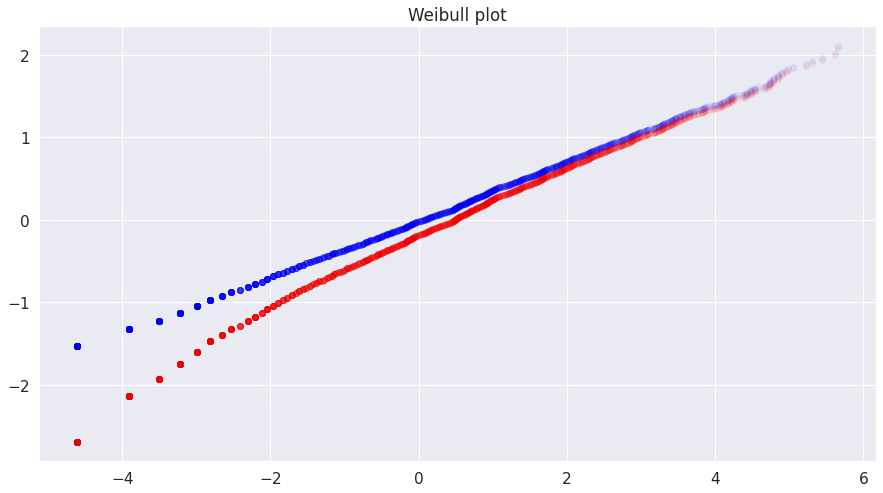

In [ ]:
plt.figure(figsize=(15,8))
plt.title("Weibull plot")

plt.scatter(x, y, color='blue', alpha=0.05)
plt.scatter(x, y_nonzero, color='red', alpha=0.05)

Сделайте вывод. Какой способ вам кажется более правильным и почему?

**Вывод** Второй (синий график).  
Во-первых, мы хотим линейную зависимость, а первый график не проходит через точку начала координат $(0, 0)$. Во-вторых, в первом случае мы теряем информацию о части выборке, выкидывая сразу нули. Эмпирическая функция при таком подходе меняется (ступеньки опускаются вниз) и хуже приближает настоящую функцию распределения.

Оцените параметр формы методом максимального правдоподобия 
* по
первым 4 годам; 
* по всей выборке.
Оценку произведите по сетке (в
логарифмической шкале). Известно, что $\log_{10}\gamma \in [-2, 2].$
Выберите шаг равным $10^{-3}.$

**Немного теории** \\
Найдем плотность как производную функции распределения: $p(x) = \gamma x^{\gamma -1} e^{-x^\gamma}$. \\

In [ ]:
def pdf(x, gamma):
  return gamma*x**(gamma-1)*np.exp((-1)*x**gamma)

def likelyhood_method(sample):
  likelyhoods = [] # сохраним все найденные значения функции правдоподобия
  for log_gamma in np.arange(-2, 2.0001, 0.001):
    gamma = 10**log_gamma
    likelyhoods.append(np.sum(np.log(pdf(sample, gamma))))
  return 10**(np.arange(-2, 2.0001, 0.001)[np.argmax(likelyhoods)])

In [ ]:
n = 365*4+1 # 4 года
four_year_sample_nonzero = weibull_sample[np.nonzero(weibull_sample[:n+1])]

gamma_4_years = likelyhood_method(four_year_sample_nonzero)
gamma_10_years = likelyhood_method(weibull_sample_nonzero)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


Сравните результаты с `sps.weibull.fit(sample_2, fscale=1, floc=0)`

In [ ]:
print(sps.weibull_min.fit(weibull_sample_nonzero, fscale=1, floc=0)[0] - gamma_10_years)
print(sps.weibull_min.fit(four_year_sample_nonzero, fscale=1, floc=0)[0] - gamma_4_years)

4.980326356041065e-05
0.00033369585354947606


Метод максимального правдоподобия дал очень точную оценку параметра.

Постройте график $y = \gamma \cdot x$ для всех полученных $\gamma$ (`plt.plot`) и `scatter plot` из предыдущего пункта ($y\prime \ x\prime$) для того метода, который вам кажется более правильным. Хорошо ли линии соответствуют выборке? Как вы думаете, почему?

**Вывод** Около 0, т.е. там, где сосредоточена бОльшая часть выборки, линии хорошо соответсвуют выборке. А вот по мере отдаления от 0 уже хуже. Вероятно, это из-за того, что элементов выборки далеко от 0 не хватает для точного приближения функции распределения эмперической функцией (т.е. если выборка маленькая, то эмперическая функция приближает плохо). 

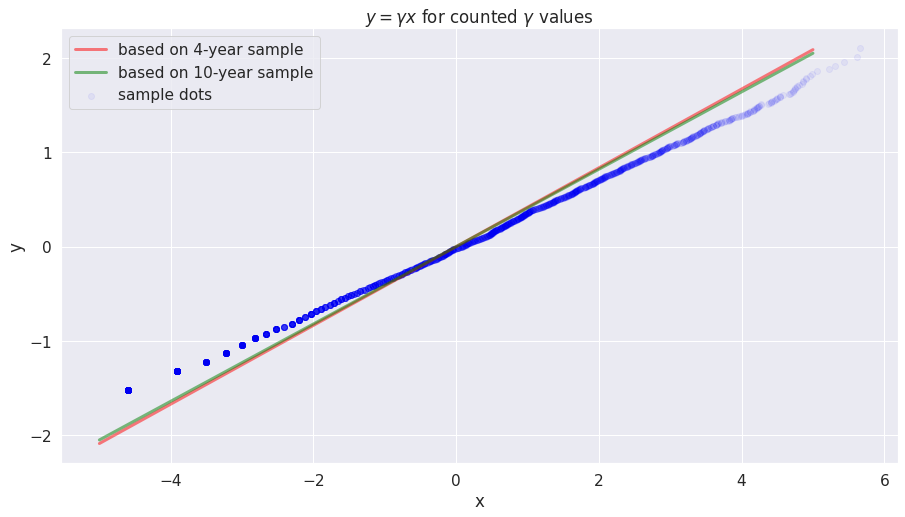

In [ ]:
plt.figure(figsize=(15,8))
plt.title("$y=\gamma x$ for counted $\gamma$ values")

grid = np.linspace(-5, 5, 1000)
plt.plot(grid, gamma_4_years*grid, lw=3, alpha=0.5, color="red", label='based on 4-year sample')
plt.plot(grid, gamma_10_years*grid, lw=3, alpha=0.5, color="green", label='based on 10-year sample')

plt.scatter(x, y, color='blue', alpha=0.05, label='sample dots')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

## Задача 3

Сгенерируйте выборки $X_1, \ldots, X_N$ из $\mathit{N}(0, \theta)$, $U(0, \theta)$, $\Gamma(1, \theta)$ (**параметризация $k, \theta$**), $\theta = 3$ для всех распределений $(N = 1000).$ Для всех $n \leq N$ посчитайте значения оценок (по выборке $X_1, \ldots X_n$) методом моментов. Постройте график ошибки оценки от реального значения ($|\hat\theta - \theta|_{l_1}$) относительно размера выборки.

In [ ]:
N = 1000
theta = 3
normal_sample = sps.norm(loc=0, scale=theta**0.5).rvs(size=N)
uniform_sample = sps.uniform(loc=0, scale=theta).rvs(size=N)
gamma_sample = sps.gamma(a=1, scale=theta).rvs(size=N)

Найдем оценки методом моментов: \\
$\mathit{N}(0, \theta)$: $\overline{X}=0, \overline{X^2}=\theta \Rightarrow \hat \theta = \overline{X^2}$ \\
 $U(0, \theta)$: $\overline{X}=\frac{\theta}{2} \Rightarrow \hat \theta = 2 \overline{X}$ \\
 $\Gamma(1, \theta)$: $\overline{X}=\hat \theta$

In [ ]:
normal_estimator = np.cumsum(normal_sample**2) / (np.arange(N)+1)
uniform_estimator = 2*np.cumsum(uniform_sample) / (np.arange(N)+1)
gamma_estimator = np.cumsum(gamma_sample) / (np.arange(N)+1)

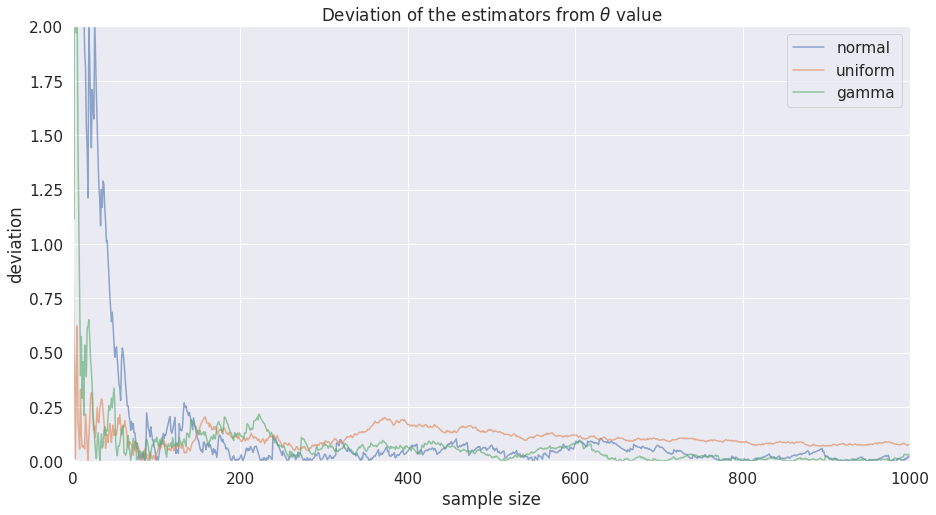

In [ ]:
plt.figure(figsize=(15,8))
plt.title("Deviation of the estimators from"+r' $\theta$'+" value")

plt.plot(range(N), np.abs(normal_estimator-theta), alpha=0.6, label='normal')
plt.plot(range(N), np.abs(uniform_estimator-theta), alpha=0.6, label='uniform')
plt.plot(range(N), np.abs(gamma_estimator-theta), alpha=0.6, label='gamma')

plt.xlim(0, N)
plt.ylim(0, 2)
plt.xlabel("sample size")
plt.ylabel("deviation")
plt.legend()
plt.show()

### Бутстреп

Для реальных данных часто сложно подобрать распределение и нужную параметризацию относительно $\theta$. Кроме того на практике сложно посчитать дисперсию оценки (для этого хотя бы нужно знать распределение, из которого пришла выборка). На помощь в таких случаях приходит **бутстреп**.

Идея очень простая. Давайте возьмем нашу выборку размера $N$ и сгенерируем из нее еще $K$ выборок. Более формально для каждой бутстрепной выборки N раз будем выбирать элементы из исходной выборки с возвращением. Полученная таким образом выборка будет содержать $\approx 63$% уникальных элементов, но это не страшно. Для всех $K$ выборок посчитаем оценку $\hat\theta$. Таким образом мы получим $K$ оценок параметра. Можно показать, что если размер бутстрепных выборок и исходной совпадают, то оценка дисперсии $s^2(\hat\theta)$, полученная из $K$ оценок, будет *хорошей*.

Для каждого распределения из предыдущего пункта (Пожалуйста, не пишите цикл по распределениям. Сделайте три отдельные ячейки) для каждого $K$ из `[10] + [50] + list(range(100, 1001, 100))` сгенерируйте K бутстрепных выборок и посчитайте дисперсию бутстрепных оценок и посчитайте среднее по K выборкам. Размер бутстрепной выборки сделайте равным $K$, незабудьте уменьшить размер исходной выборки до $K$. Постройте график следующим образом: по оси $x$ отложите значения $K$, красной линией обозначьте среднее значение $\hat\theta$ бутстрепных выборок для каждого $K$. Посчитайте стандартное отклонение оценки для каждого $K$ и закрасьте интервал $\mu(k) \pm \sigma(\hat\theta)$ (`plt.fillbetween`).



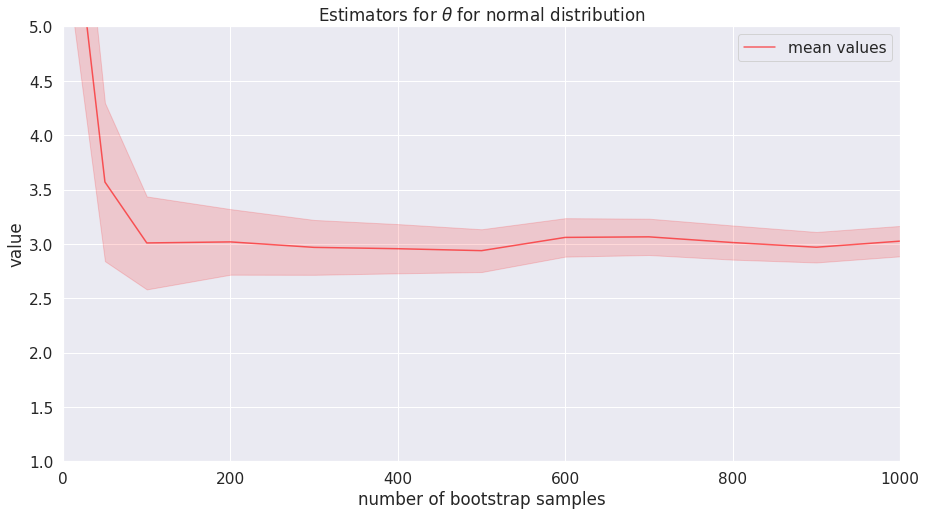

In [ ]:
# normal distribution

bootstrap_size = [10] + [50] + list(range(100, 1001, 100))
sample_variances = []
estimator_mean_values = []

for k in bootstrap_size:
  estimator_values = np.array([(np.sum(np.random.choice(normal_sample[:k], k)**2)/k) for i in range(k)])
  estimator_mean_values.append(np.mean(estimator_values))
  sample_variances.append(np.mean(estimator_values**2)-np.mean(estimator_values)**2)

sample_variances = np.array(sample_variances)
estimator_mean_values = np.array(estimator_mean_values)

# illustration    
plt.figure(figsize=(15,8))
plt.title(r"Estimators for $\theta$ for normal distribution")

plt.plot(bootstrap_size, estimator_mean_values, alpha=0.6, color='red', label='mean values')
plt.fill_between(
    x=bootstrap_size, 
    y1=estimator_mean_values+sample_variances**0.5, 
    y2=estimator_mean_values-sample_variances**0.5, 
    alpha=0.15,
    color='red'
)

plt.xlim(0, N)
plt.ylim(1, 5)
plt.xlabel("number of bootstrap samples")
plt.ylabel("value")
plt.legend()
plt.show()

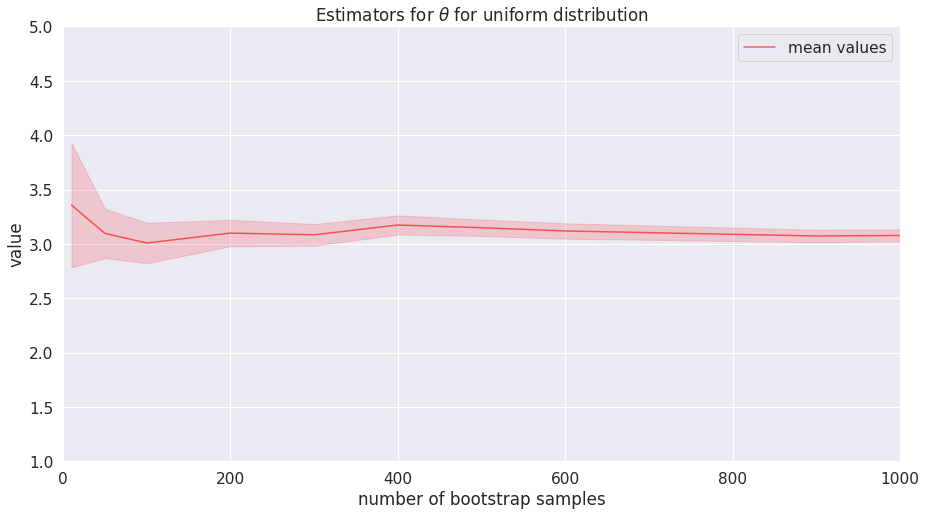

In [ ]:
# uniform distribution

bootstrap_size = [10] + [50] + list(range(100, 1001, 100))
sample_variances = []
estimator_mean_values = []

for k in bootstrap_size:
  estimator_values = np.array([(2*np.sum(np.random.choice(uniform_sample[:k], k))/k) for i in range(k)])
  estimator_mean_values.append(np.mean(estimator_values))
  sample_variances.append(np.mean(estimator_values**2)-np.mean(estimator_values)**2)

sample_variances = np.array(sample_variances)
estimator_mean_values = np.array(estimator_mean_values)

# illustration    
plt.figure(figsize=(15,8))
plt.title(r"Estimators for $\theta$ for uniform distribution")

plt.plot(bootstrap_size, estimator_mean_values, alpha=0.6, color='red', label='mean values')
plt.fill_between(
    x=bootstrap_size, 
    y1=estimator_mean_values+sample_variances**0.5, 
    y2=estimator_mean_values-sample_variances**0.5, 
    alpha=0.15,
    color='red'
)

plt.xlim(0, N)
plt.ylim(1, 5)
plt.xlabel("number of bootstrap samples")
plt.ylabel("value")
plt.legend()
plt.show()

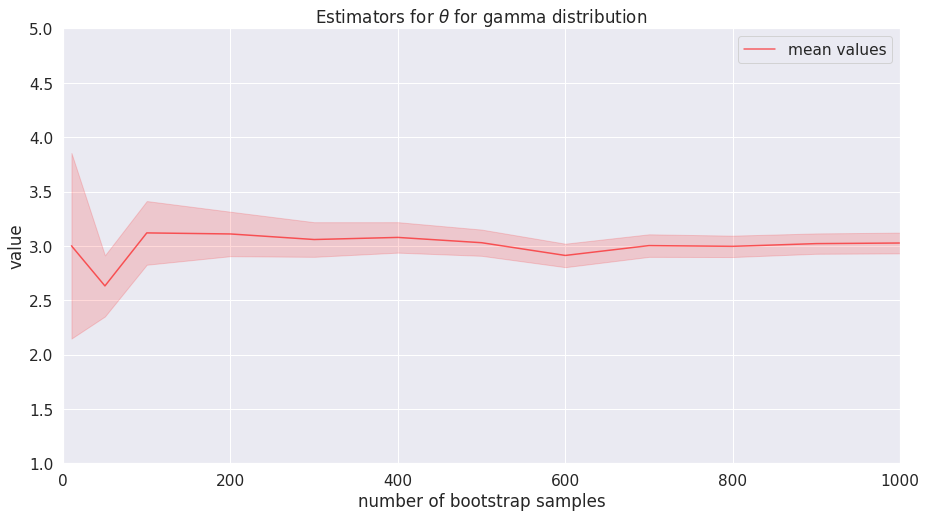

In [ ]:
# gamma distribution

bootstrap_size = [10] + [50] + list(range(100, 1001, 100))
sample_variances = []
estimator_mean_values = []

for k in bootstrap_size:
  estimator_values = np.array([(np.sum(np.random.choice(gamma_sample[:k], k))/k) for i in range(k)])
  estimator_mean_values.append(np.mean(estimator_values))
  sample_variances.append(np.mean(estimator_values**2)-np.mean(estimator_values)**2)

sample_variances = np.array(sample_variances)
estimator_mean_values = np.array(estimator_mean_values)

# illustration    
plt.figure(figsize=(15,8))
plt.title(r"Estimators for $\theta$ for gamma distribution")

plt.plot(bootstrap_size, estimator_mean_values, alpha=0.6, color='red', label='mean values')
plt.fill_between(
    x=bootstrap_size, 
    y1=estimator_mean_values+sample_variances**0.5, 
    y2=estimator_mean_values-sample_variances**0.5, 
    alpha=0.15,
    color='red'
)

plt.xlim(0, N)
plt.ylim(1, 5)
plt.xlabel("number of bootstrap samples")
plt.ylabel("value")
plt.legend()
plt.show()